
___
# Linear Regression Hands-On Activity

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. 

**Predict the yearly amount spent by customers on online shopping**

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/Ecommerce%20Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

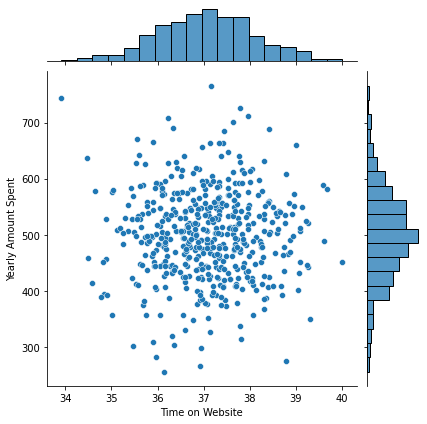

In [9]:
sns.jointplot(x = 'Time on Website',y = 'Yearly Amount Spent', data = customers)

** Do the same but with the Time on App column instead. **

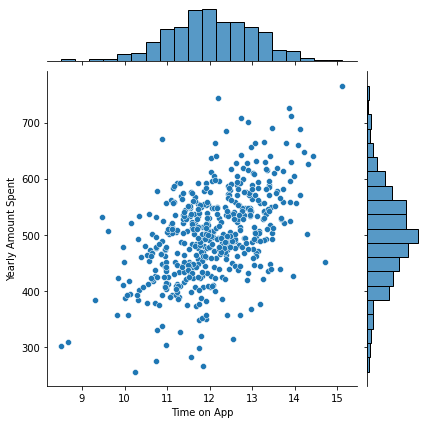

In [10]:
sns.jointplot(x = 'Time on App',y = 'Yearly Amount Spent', data = customers)

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


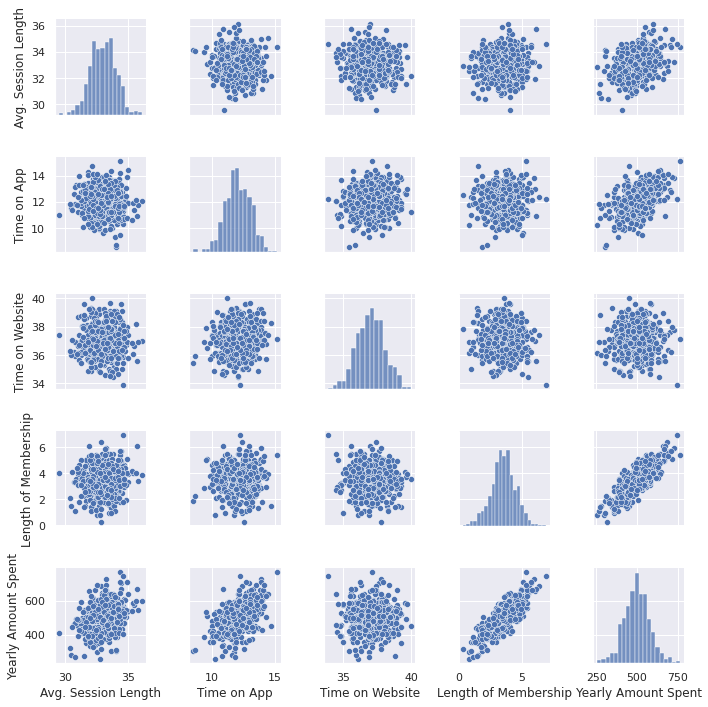

In [ ]:
sns.set()
sns.pairplot(customers, size = 2.0)
plt.show()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [ ]:
length of membership

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

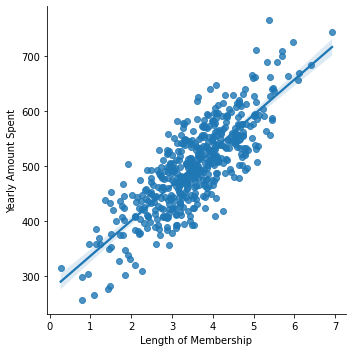

In [4]:
sns.lmplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data = customers)

# Defining x and y

Identify the dependent and independent variables

In [87]:
y_dep = customers['Yearly Amount Spent']
x_ind = customers.iloc[:, [3,4,5,6]]
print(y)
print(x_ind)

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64
     Avg. Session Length  Time on App  Time on Website  Length of Membership
0              34.497268    12.655651        39.577668              4.082621
1              31.926272    11.109461        37.268959              2.664034
2              33.000915    11.330278        37.110597              4.104543
3              34.305557    13.717514        36.721283              3.120179
4              33.330673    12.795189        37.536653              4.446308
..                   ...          ...              ...                   ...
495            33.237660    13.566160        36.417985              3.746573
496            34.702529    11.695736        37.190268              3.576526
497            32.646777    11.499409        38.332576

## Linear Regression and Fitting the model
** Import LinearRegression from sklearn.linear_model **

In [15]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [30]:
y_dep = customers['Yearly Amount Spent']
print(y)
lm = LinearRegression()

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64


** Train/fit lm on the training data.**

In [43]:
lm.fit(x_ind, y_dep)

LinearRegression()

**Print out the coefficients of the model**

In [44]:
lm.coef_

array([25.73427108, 38.70915381,  0.43673884, 61.57732375])

## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X set of the data.**

In [47]:
lm.predict(x_ind)[0:5]

array([594.73928806, 380.36380488, 505.20013188, 570.3974544 ,
       591.62270961])

In [48]:
print("Predicted:", lm.predict(x_ind)[0:5])
print("Actual:", customers['Yearly Amount Spent'].to_list()[0:5])

Predicted: [594.73928806 380.36380488 505.20013188 570.3974544  591.62270961]
Actual: [587.9510539684005, 392.2049334443264, 487.54750486747207, 581.8523440352178, 599.4060920457634]


# Linear Regression with Statsmodels

Run an OLS linear regression model using statsmodels package

Which variables did you include in your formula? Explain your thought process. 

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [83]:
x_y = customers.iloc[:, [3,4,5,6,7]]
print(x_y)

     Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0              34.497268    12.655651        39.577668              4.082621   
1              31.926272    11.109461        37.268959              2.664034   
2              33.000915    11.330278        37.110597              4.104543   
3              34.305557    13.717514        36.721283              3.120179   
4              33.330673    12.795189        37.536653              4.446308   
..                   ...          ...              ...                   ...   
495            33.237660    13.566160        36.417985              3.746573   
496            34.702529    11.695736        37.190268              3.576526   
497            32.646777    11.499409        38.332576              4.958264   
498            33.322501    12.391423        36.840086              2.336485   
499            33.715981    12.418808        35.771016              2.735160   

     Yearly Amount Spent  
0           

In [90]:
formula = 'Yearly Amount Spent ~ Avg. Session Length+Time on App+Time on Website+Length of Membership'


In [64]:
outcome = 'Yearly Amount Spent'
predictors = x_y.drop('Yearly Amount Spent', axis=1)
pred_sum = '+'.join(predictors.columns)
print("Predictors:", pred_sum)
formula = outcome + '~' + pred_sum
print("Formula:", formula)

Predictors: Avg. Session Length+Time on App+Time on Website+Length of Membership
Formula: Yearly Amount Spent~Avg. Session Length+Time on App+Time on Website+Length of Membership


In [75]:
import statsmodels.api as sm

In [76]:
predictors_int = sm.add_constant(predictors)
predictors_int

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,1.0,34.497268,12.655651,39.577668,4.082621
1,1.0,31.926272,11.109461,37.268959,2.664034
2,1.0,33.000915,11.330278,37.110597,4.104543
3,1.0,34.305557,13.717514,36.721283,3.120179
4,1.0,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...,...
495,1.0,33.237660,13.566160,36.417985,3.746573
496,1.0,34.702529,11.695736,37.190268,3.576526
497,1.0,32.646777,11.499409,38.332576,4.958264
498,1.0,33.322501,12.391423,36.840086,2.336485


In [89]:
model = sm.OLS(customers['Yearly Amount Spent'], predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.984
Model:                             OLS   Adj. R-squared:                  0.984
Method:                  Least Squares   F-statistic:                     7766.
Date:                 Sat, 14 Jan 2023   Prob (F-statistic):               0.00
Time:                         12:25:24   Log-Likelihood:                -1856.9
No. Observations:                  500   AIC:                             3724.
Df Residuals:                      495   BIC:                             3745.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1051.5943     22.993    -45.736      0.000   -1096.769   -1006.419
Avg. Session Length     25.7343      0.451     57.057      0.000      24.848      26.620
Time on App             38.7092      0.451     85.828      0.000      37.823      39.595
Time on Website          0.4367      0.444      0.983      0.326      -0.436       1.309
Length of Membership    61.5773      0.448    137.346      0.000      60.696      62.458
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.198
Skew:                          -0.026   Prob(JB):                        0.906
Kurtosis:                       3.083   Cond. No.                     2.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
I used the variables Avg. Session Length, Time on App, Time on Website, Length of Membership in my formula as the value of x since these are the factors that causes for the y (Yearly Amount Spent to either increase or decrease.